### Train a linear regression model using PyTorch

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

In [36]:
# Create col matrix of x vals
X = torch.linspace(1,50,50).reshape(-1,1)

In [37]:
# Add error term so we don't get a perfectly straight line
e = torch.randint(-1,9,(50,1), dtype=torch.float)

In [10]:
y = 2*X + 1 + e

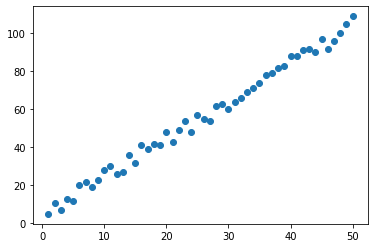

In [11]:
plt.scatter(X.numpy(), y.numpy())

In [12]:
# Build linear model
model = nn.Linear(in_features=1, out_features=1)  # X has 1 feature, y has 1 feature
print('Weight: ', model.weight)
print('Bias: ', model.bias)

Weight:  Parameter containing:
tensor([[-0.5689]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.0345], requires_grad=True)


In [43]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        # Inherit from the nn.Module class
        super().__init__()
        # Define linear layer type
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [44]:
model = Model(1,1)
print('Weight: ', model.linear.weight)
print('Bias: ', model.linear.bias)

Weight:  Parameter containing:
tensor([[0.5707]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.4134], requires_grad=True)


In [45]:
for name,param in model.named_parameters():
    print(f'{name}:\t{param.item()}')

linear.weight:	0.5706683397293091
linear.bias:	-0.4134176969528198


In [46]:
# Find value of model when x = 2
x = torch.tensor([2.])
print(model.forward(x))

tensor([0.7279], grad_fn=<AddBackward0>)


In [47]:
# Set initial x vals
x1 = np.linspace(0,50,50)

# Given x1 vals from 0-50, what does the model (with randomly selected weights and biases) think y should be?
w1 = model.linear.weight
b1 = model.linear.bias

# Get predicted y vals from x1
y1 = w1*x1 + b1

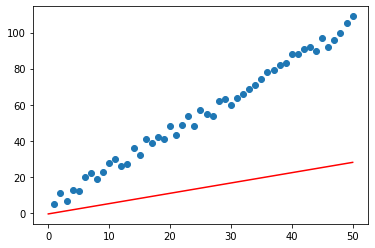

In [64]:
plt.plot(x1,y1, color='red')
plt.scatter(X.numpy(), y.numpy())

In [65]:
# The model performs very poorly (as expected), based on the first random guess for weight and bias. We now set the loss function to allow the model to learn and improve.

In [68]:
# Loss function - called "criterion" bc it is the criteria on which we evaluate network performance
criterion = nn.MSELoss()

# Stochastic Gradient Descent optimizer has applied learning rate. LR tells optimizer how much to adjust each param on each round of calcs. Too large of a step risks overshooting minimum. Too small risks taking too long to converge.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Good starting learning rate is 0.001, but often requires experimentation

# Epoch = single pass through entire dataset. Want to pick a sufficiently large # of epochs so our weight plateaus near 2 and bias plateaus near 1. Often requires experimentation, which can be helped by keeping track of the loss.
epochs = 50
losses = []

for i in range(epochs):
    i += 1
    # Predict on forward pass
    y_pred = model.forward(X)
    # Calculate loss (error)
    loss = criterion(y_pred, y)
    # Record error
    losses.append(loss)
    print(f'Epoch {i} loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}')

    # Adjust weight and bias. Gradients accumulate with every backprop, so we reset gradient with each new epoch
    optimizer.zero_grad()  # Resets gradient

    # Perform backpropagation
    loss.backward()
    optimizer.step()  # Update hyperparameters

Epoch 1 loss: 2153.6669921875, weight: 0.5706683397293091, bias: -0.4134176969528198
Epoch 2 loss: 1118.23779296875, weight: 3.281754970550537, bias: -0.33045494556427
Epoch 3 loss: 583.6802368164062, weight: 1.3336750268936157, bias: -0.3859235346317291
Epoch 4 loss: 307.7047424316406, weight: 2.7332773208618164, bias: -0.3419291079044342
Epoch 5 loss: 165.22549438476562, weight: 1.7275185585021973, bias: -0.3694024085998535
Epoch 6 loss: 91.66586303710938, weight: 2.4500489234924316, bias: -0.3455270528793335
Epoch 7 loss: 53.6867561340332, weight: 1.930776834487915, bias: -0.35854849219322205
Epoch 8 loss: 34.07673263549805, weight: 2.3037590980529785, bias: -0.3450610041618347
Epoch 9 loss: 23.94997787475586, weight: 2.0356428623199463, bias: -0.35062259435653687
Epoch 10 loss: 18.719106674194336, weight: 2.228165864944458, bias: -0.34249913692474365
Epoch 11 loss: 16.01581573486328, weight: 2.089712381362915, bias: -0.34421059489250183
Epoch 12 loss: 14.617405891418457, weight: 2.

Text(0.5, 0, 'Epoch')

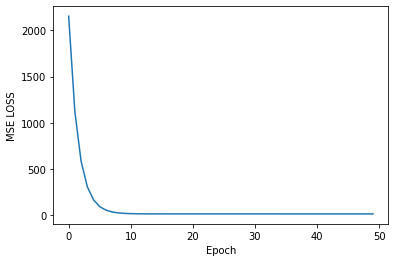

In [79]:
plt.plot(range(epochs), [el.item() for el in losses])
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [86]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*X + current_bias
preds = predicted_y.reshape(1,50)[0]
preds

tensor([  1.8973,   4.0421,   6.1868,   8.3315,  10.4763,  12.6210,  14.7658,
         16.9105,  19.0553,  21.2000,  23.3448,  25.4895,  27.6343,  29.7790,
         31.9238,  34.0685,  36.2132,  38.3580,  40.5027,  42.6475,  44.7922,
         46.9370,  49.0817,  51.2265,  53.3712,  55.5160,  57.6607,  59.8055,
         61.9502,  64.0949,  66.2397,  68.3844,  70.5292,  72.6739,  74.8187,
         76.9634,  79.1082,  81.2529,  83.3977,  85.5424,  87.6871,  89.8319,
         91.9766,  94.1214,  96.2661,  98.4109, 100.5556, 102.7004, 104.8451,
        106.9899])

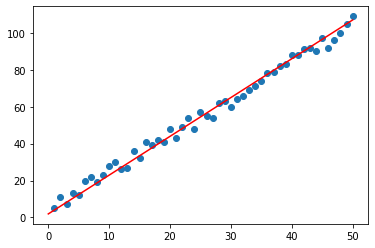

In [89]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, preds, color='red')

In [ ]:
# This looks much better!